In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
df = pd.read_csv("Caschool.csv", encoding="latin1")
df.headd()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


Sample Size: 420
Test Score Mean: 654.156548055013
Test Score Median: 654.4499816894536
Test Score Std Dev: 19.053347643618793
Student Teacher Ratio Mean: 19.64042526199704
Student Teacher Ratio Median: 19.7232084274292
Student Teacher Ratio Std Dev: 1.891811787233676


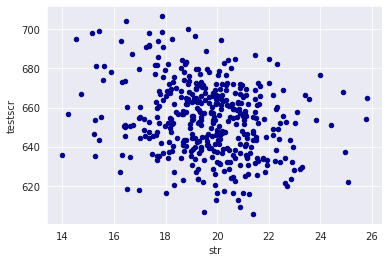

In [9]:
print("Sample Size:", len(df))

print("Test Score Mean:", df["testscr"].mean())
print("Test Score Median:", df["testscr"].median())
print("Test Score Std Dev:", df["testscr"].std())

print("Student Teacher Ratio Mean:", df["str"].mean())
print("Student Teacher Ratio Median:", df["str"].median())
print("Student Teacher Ratio Std Dev:", df["str"].std())

ax = df.plot.scatter(x="str", y="testscr", c="DarkBlue")

In [13]:
# add constant
df = sm.add_constant(df) # df["const"] = 1 

# Run egression model!
reg = sm.OLS(endog=df["testscr"], exog=df[["const", "str"]], missing="drop")
result = reg.fit()
print(result.summary())

# Intercept = 698.9330 where it cuts the y-axis
# When Student Teacher Ratio increases by 1, Test Score decreases by an average of 2.2798 (coef)
# So Student Teacher Ratio is an important metric!
# pvalue =  absolutely significant!
# R^2 very low value. My model has an unexplained error.

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.78e-06
Time:                        00:23:43   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330      9.467     73.825      0.0

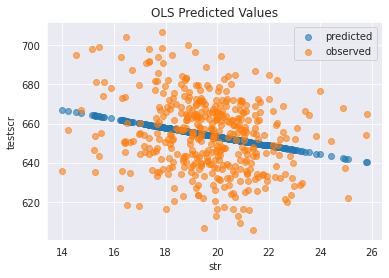

In [14]:
# plot
df_plot = df.dropna(subset=["testscr", "str"])

# plot predicted values
plt.scatter(df_plot["str"], result.predict(), alpha=0.6, label="predicted")

# plot observed values
plt.scatter(df_plot["str"], df_plot["testscr"], alpha=0.6, label="observed")

plt.legend()
plt.title("OLS Predicted Values")
plt.xlabel("str")
plt.ylabel("testscr")
plt.show()